In [1]:
%matplotlib inline
import os
from matplotlib import pyplot
import numpy as np
import datajoint as dj
dj.config['database.prefix'] = os.environ.get('DJ_PREFIX', 'user_kabilar_')
print(dj.config['database.prefix'])

from pipeline import meso, stack

user_kabilar_
Loading local settings from pipeline_config.json
Connecting kabilar@jr-database.ad.bcm.edu:3306


In [2]:
key_meso  = {'animal_id': 124,
             'session': 9,
             'scan_idx': 1,
             'field': 1}

key_stack = {'animal_id': 124, 
             'stack_session': 9, 
             'stack_idx': 3, 
             'scan_session': key_meso['session'], 
             'scan_idx': key_meso['scan_idx'], 
             'field': key_meso['field']}

-24.648392922906147 6799.753240705872 (440, 120) 1.0 5.0 5.0


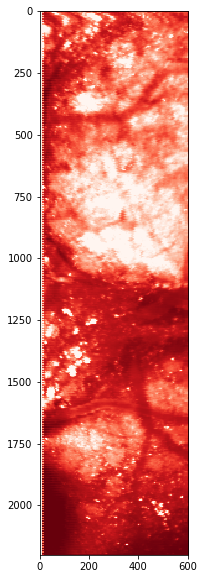

In [3]:
average_image = (meso.SummaryImages.Average & key_meso).fetch1('average_image')

# Calculate aspect ratio of pixels
px_height, px_width, um_height, um_width = (meso.ScanInfo.Field & key_meso).fetch1('px_height','px_width','um_height','um_width')
dx_height = um_height/px_height
dx_width = um_width/px_width
aspect_meso = dx_height/dx_width

print(np.nanmin(average_image), np.nanmax(average_image), np.shape(average_image), aspect_meso, dx_height, dx_width)

pyplot.figure(figsize = (10,10))
pyplot.imshow(average_image, vmin=0, vmax=300, aspect=aspect_meso, extent=[0,um_width,um_height,0], cmap='Reds_r')

-343.838 7149.927 (2200, 600)


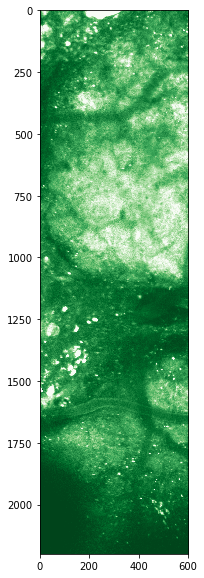

In [4]:
reg_field_affine = (stack.Registration.Affine & key_stack).fetch1('reg_field')

print(np.nanmin(reg_field_affine), np.nanmax(reg_field_affine), np.shape(reg_field_affine))

pyplot.figure(figsize = (10,10))
pyplot.imshow(reg_field_affine, vmin=0, vmax=300, aspect=1, cmap='Greens_r')

-408.25455 7264.215 (2200, 600)


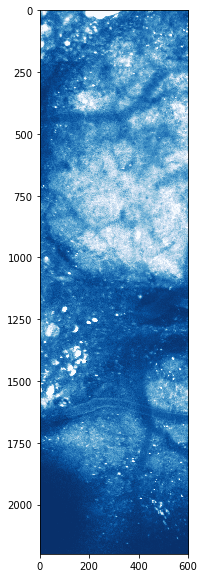

In [5]:
reg_field_nonrigid = (stack.Registration.NonRigid & key_stack).fetch1('reg_field')

print(np.nanmin(reg_field_nonrigid), np.nanmax(reg_field_nonrigid), np.shape(reg_field_nonrigid))

pyplot.figure(figsize = (10,10))
pyplot.imshow(reg_field_nonrigid, vmin=0, vmax=300, aspect=1, cmap='Blues_r')

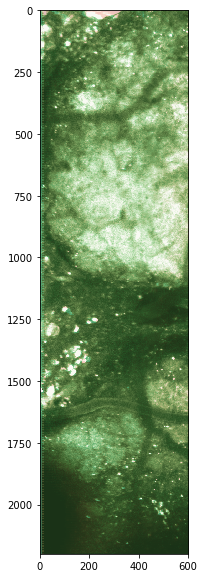

In [6]:
pyplot.figure(figsize = (10,10))
pyplot.imshow(average_image,    vmin=0, vmax=300 , aspect=aspect_meso, cmap='Reds_r',   extent=[0,um_width,um_height,0])
pyplot.imshow(reg_field_affine, vmin=0, vmax=300,  aspect=1,           cmap='Greens_r', alpha=0.75)

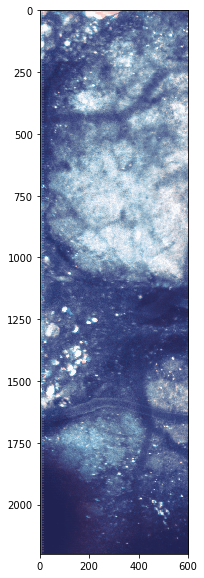

In [7]:
pyplot.figure(figsize = (10,10))
pyplot.imshow(average_image,      vmin=0, vmax=300 , aspect=aspect_meso, cmap='Reds_r',  extent=[0,um_width,um_height,0])
pyplot.imshow(reg_field_nonrigid, vmin=0, vmax=300,  aspect=1,           cmap='Blues_r', alpha=0.75)